Time Series Analysis of Daily Electricity Consumption

In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
# df = pd.read_csv('household_power_consumption.txt', sep=';',na_values='?')
# df

In [4]:
# df.to_csv("household_power_consumption.csv")

In [5]:
df = pd.read_csv("household_power_consumption.csv")
df

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
2075254,2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [6]:
df.isnull().sum()

Unnamed: 0                   0
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df.dtypes

Unnamed: 0                 int64
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [8]:
df.dtypes

Unnamed: 0                 int64
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('Date_time')


C:\Users\bbuser\AppData\Local\Temp\ipykernel_19648\1772143790.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.loc['2008-10']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,,,
2008-10-01 00:00:00,1/10/2008,00:00:00,0.352,0.098,243.94,1.4,0.0,0.0,1.0
2008-10-01 00:01:00,1/10/2008,00:01:00,0.350,0.100,244.18,1.4,0.0,0.0,0.0
2008-10-01 00:02:00,1/10/2008,00:02:00,0.350,0.100,244.24,1.4,0.0,0.0,1.0
2008-10-01 00:03:00,1/10/2008,00:03:00,0.348,0.098,244.07,1.4,0.0,0.0,1.0
2008-10-01 00:04:00,1/10/2008,00:04:00,0.348,0.100,244.52,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2008-10-31 23:55:00,31/10/2008,23:55:00,0.502,0.050,242.79,2.2,0.0,0.0,0.0
2008-10-31 23:56:00,31/10/2008,23:56:00,0.502,0.052,243.31,2.2,0.0,0.0,0.0
2008-10-31 23:57:00,31/10/2008,23:57:00,0.620,0.184,243.38,2.8,0.0,0.0,0.0


In [ ]:
# Daily
df['Global_active_power'].resample('D').mean()

Date_time
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64

In [ ]:
# Weekly
df['Global_active_power'].resample('W').mean()

Date_time
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
                ...   
2010-10-31    0.958963
2010-11-07    1.154565
2010-11-14    1.335928
2010-11-21    1.107106
2010-11-28    1.186756
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

In [ ]:
# Monthly
df['Global_active_power'].resample('M').mean()

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19648\1312496268.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Global_active_power'].resample('M').mean()


Date_time
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
2007-05-31    0.985862
2007-06-30    0.826814
2007-07-31    0.667367
2007-08-31    0.764186
2007-09-30    0.969318
2007-10-31    1.103911
2007-11-30    1.294473
2007-12-31    1.626474
2008-01-31    1.459920
2008-02-29    1.181384
2008-03-31    1.245337
2008-04-30    1.115972
2008-05-31    1.024281
2008-06-30    0.994096
2008-07-31    0.794781
2008-08-31    0.276488
2008-09-30    0.987680
2008-10-31    1.136768
2008-11-30    1.387066
2008-12-31    1.275189
2009-01-31    1.410202
2009-02-28    1.247568
2009-03-31    1.226735
2009-04-30    1.140690
2009-05-31    1.012856
2009-06-30    0.840756
2009-07-31    0.618121
2009-08-31    0.664619
2009-09-30    0.986841
2009-10-31    1.144486
2009-11-30    1.274743
2009-12-31    1.364421
2010-01-31    1.430525
2010-02-28    1.375855
2010-03-31    1.130075
2010-04-30    1.027295
2010-05-31    1.095284
2010-06-30    0.969615
2

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19648\3005433062.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df['Global_active_power'].resample('M').mean(),color='red')


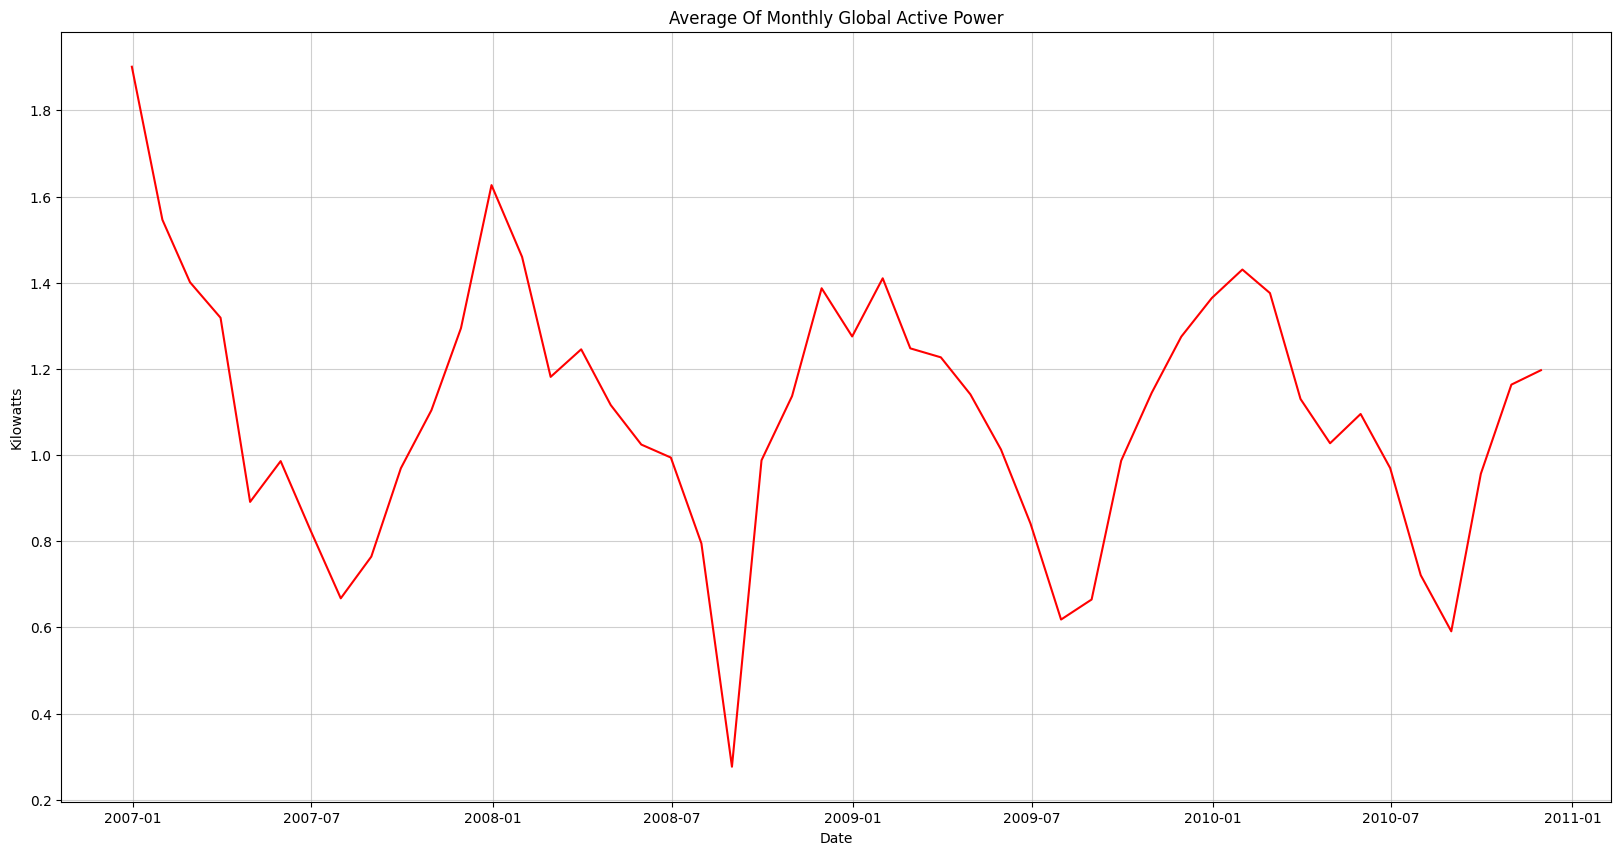

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Global_active_power'].resample('M').mean(),color='red')
plt.title("Average Of Monthly Global Active Power")
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.grid(True,alpha=0.6)
plt.show()
